## Kernel PCA
#### Team members: Liule Yang, Zhiwen Xu, Yuxuan Liu

## Background and motivation

High dimensionality has long posed troubles to the data visualization and analysis for researchers. In recent years, there is an urgent need to develop methods to reduce high dimensionality, especially in the field of biology and chemistry $^{[5]}$. Principal component analysis (PCA) is one of the most popular dimensionality reduction techniques $^{[3]}$. PCA can extract linear features of a matrix input data and some meaningful analysis can be performed based on the principal components. The principle directions can be achieved through eigen-decomposition of the covariance matrix of feature matrix as well as singular value decomposition (SVD) of feature matrix. A typical application of PCA can be the visualization of high-dimensional biological data sets, such as DNA sequences.

However, PCA fails when the data is not linearly separable, as we will show later in the Data section. In this case, we need to apply an extra kernel trick when calculating the principle components. Kernel PCA(KPCA) turns out to achieve good results for non-linear feature data.

## Theory

### PCA

Before explaining how Kernel PCA works, we first provide a brief introduction to PCA:

Let d denote the dimension of the feature space, i.e. ${x} \in \mathbb{R}^{D} $, q denote the dimension of projection subspace. The principle components(PC) are the vectors that span the projection subspace. To find the PCs, we can maximize the variance or equivalently, minimize the mean squared error between projection vectors and originial vectors. This tutorial will follow the steps of variance maximization:

(1). To derive an expression for the variance, we first need the scalar projection of x, which is the length of vector projection, into the principal vector space. As we already learned from the class that the orthogonal projection of $v$ on an orthonormal list $\left\{\mathbf{q}_{i}\right\}_{i=1}^{m}$ is $\sum_{j=1}^{m}\left\langle\mathbf{v}, \mathbf{q}_{j}\right\rangle \mathbf{q}_{j}$. Since principal directions span the projection subspace, they can be expressed as $\left\{\mathbf{q}_{i}\right\}_{i=1}^{q}$. The scalar projection of x into ${q}_{i}$will be $\left\langle\mathbf{v}, \mathbf{q}_{i}\right\rangle$. We then can calculate the variance:

$$\begin{aligned}
\sigma^{2} &=\frac{1}{n} \sum_{i}\left(\mathbf{x_{i}} \cdot \mathbf{q}\right)^{2} \\
&=\frac{1}{n}(\mathbf{x} \mathbf{q})^{T}(\mathbf{x} \mathbf{q}) \\
&=\frac{1}{n} \mathbf{q}^{T} \mathbf{x}^{T} \mathbf{x} \mathbf{q} \\
&=\mathbf{q}^{T} \frac{\mathbf{x}^{T} \mathbf{x}}{n} \mathbf{q} \\
\end{aligned}
$$

We assume that the data has zero mean(in the case where data is not centered at 0, we normalize it first), then $\mathbf{x}^{T} \mathbf{x} = {n}{C}$ and ${C}$ is the covariance matrix. Therefore, 

$$
\sigma^{2}=\mathbf{q}^{T} {C} \mathbf{q} \\
$$

(2) Maximize the variance by adding a Lagrange multiplier and taking derivatives to 0, we have:

$$\begin{aligned}
\mathbf{q}^{T} \mathbf{q} &=1 \\
{C} \mathbf{q} &=\lambda \mathbf{q}
\end{aligned}$$

Therefore, the principal directions are the eigenvectors of covariance matrix that correspond to the q largest eigenvalues. We can find the principal directions by direct eigen-decomposition, or by singular value decomposition(SVD).

As we discussed in class, any matrix has singular value decomposition, then ${x}$ can be written as:

$$
x= U \Sigma V^{T}
$$

Note that ${U}$ and ${V}$ are orthonormal.

Since ${C} = \frac{\mathbf{x}^{T} \mathbf{x}}{n}$, the covariance matrix is symmetric and can be diagonalized:

$${C}={V} {L} {V}^{T}$$

where ${V}$ is the eigenvector and $L$ has eigenvalues on the diagonal with decreasing order.

Plug in the SVD of ${x}$ to ${C}$, we have:

$${C}=\frac{(U \Sigma V^{T})^{T} {U \Sigma V}^{T}} {n}= \frac{ V \Sigma^{T} U^{T} {U^{T} \Sigma V^{T}}} {n}={V} \frac{{\Sigma}^{2}}{n} {V}^{T}$$

The right singular vectors ${V}$ are principal directions and the eigenvalues of covariance matrix are $\lambda_{i}=\frac{s_{i}^{2}}{n}$, where $s_{i}$ are the singular values. Principal components are given by ${x \cdot V}={U \Sigma V}^{T} {V}={U \Sigma}$

### Kernel function and Kernel

To tackle the problems where we have non-linear data structure, we apply a Kernel function to map the current space to a higher dimensional and linearly separable space. The Kernel function is non-linear and maps x to $\phi{(x)}$. A kernel calculates the dot product of the kernel mapping of two data points:

$$K\left({x}_{{i}}, {x}_{{j}}\right)=\phi\left({x}_{{i}}\right) \phi\left({x}_{{j}}\right)^{T}$$

Let d denote the dimension of the original data before mapping, and D the dimension of the transformed data after kernel mapping. A simple example of the function and kernel can be:

$$ {x}=\left[\begin{array}{ll}
x_{1} & x_{2}
\end{array}\right]^{T} \quad {x} \in \mathbb{R}^{d} $$

$$
{\phi{(x)}}=\left[\begin{array}{llllll}
x_{1}^{2} & x_{1}x_{2} & {x}_{2}{x}_{1} & x_{2}^{2} \end{array}\right]^{T} \quad {x} \in \mathbb{R}^{D}
$$

$$
K\left({x}_{{i}}, {x}_{{j}}\right)=\phi\left({x}_{{i}}\right) \phi\left({x}_{{j}}\right)^{T} = (<{x}_{i},{x}_{j}>)^{2}
$$

There are some commonly used kernels, such as:

(1). Gaussian radial basis function (RBF): 
$$
K\left({x}_{{i}}, {x}_{{j}}\right)=\exp \left(-\gamma\left\|{x}_{{i}}-{x}_{{j}}\right\|_{2}^{2}\right)
$$

(2). Polynomial function:

$$
K\left({x}_{i}, {x}_{j}\right)=\left(1+{x}_{i} \cdot {x}_{j}\right)^{p}
$$

(3). Sigmoid function:
$$K\left({x}_{i}, {x}_{j}\right)=\tanh \left({x}_{i} \cdot {x}_{j}+\delta\right)$$

We will implement all three kinds of kernel functions and compare their performances in the Data section.

### Kernel PC Calculation & Derivation

Similar to the eigen-decomposition of covariance matrix in PCA, we want to find the eigenvectors that correspond to the largest eigenvalues by applying the eigen-decomposition to the centered kernel matrix in Kernel PCA. 

The whole process can be devided into the following steps:

(1) First we assume that the data has a zero mean:
$$\mu=\frac{1}{n} \sum_{i=1}^{n} \phi\left(x_{i}\right)=0$$ 

(2) Then we need the expression for the covariance matrix:

According the definition of covariance matrix(as introduced in the Probabilistic modeling, inference and sampling part),

$${C}_{{x},{x}}=\mathbb{E}\left[({x}-\mathbb{E}[{x}])({x}-\mathbb{E}[{x}])^{T}\right]$$

The covariance matrix can be estimated by:

$$C=\frac{1}{n} \sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)\left(x_{i}-\bar{x}\right)^{T}$$

Since we assume that the data has zero mean ($\bar{x} = 0$), and also apply a kernel function to x, we obtain the following:

$$\mathrm{C}=\frac{1}{n} \sum_{i=1}^{n} \phi\left(x_{i}\right) \phi\left(x_{i}\right)^{T} \hspace{1cm}{(1)}$$ 

The eigen-decomposition of covariance matrix is:

$$\mathrm{C} v=\lambda v  \hspace{1cm}{(2)}$$ 

(3) Combine Eq.(1) and Eq.(2), we have:

$$\mathrm{C} v=\frac{1}{n} \sum_{i=1}^{n} \phi\left(x_{i}\right) \phi\left(x_{i}\right)^{T} v=\lambda v \hspace{1cm}{(3)}$$

$$v=\frac{1}{\lambda n} \sum_{i=1}^{n} \phi\left(x_{i}\right) \phi\left(x_{i}\right)^{T} v=\frac{1}{\lambda n} \sum_{i=1}^{n}\left(\phi\left(x_{i}\right) \cdot v\right) \phi\left(x_{i}\right)^{T}  \hspace{1cm}{(4)}$$

Let $\alpha_{i} = \frac{\phi(x_{i})\cdot v}{n \cdot \lambda}$, we have 
$$
v=\sum_{i=1}^{n} \alpha_{i} \phi\left(x_{i}\right) \hspace{1cm}{(5)}
$$

Thus, we can see that the eigenvectors are the linear combinations of $\phi(x_{i})$.

(4) Subsitute the eigenvector in Eq.(3) by Eq.(5), we have:
$$\frac{1}{n} \sum_{i=1}^{n} \phi\left(x_{i}\right) \phi\left(x_{i}\right)^{T}\left(\sum_{j=1}^{n} \alpha^{k}_{j} \phi\left(x_{j}\right)\right)=\lambda_{k} \sum_{j=1}^{n} \alpha^{k}_{j} \phi\left(x_{j}\right)$$

Then, since $ K\left({x}_{{i}}, {x}_{{j}}\right)=\phi\left({x}_{{i}}\right) \phi\left({x}_{{j}}\right)^{T}$,
$$\frac{1}{n} \sum_{i=1}^{n} \phi\left(x_{i}\right)\left(\sum_{j=1}^{n} \alpha^{k}_{j} K\left(x_{i}, x_{j}\right)\right)=\lambda_{k} \sum_{j=1}^{n} \alpha^{k}_{j} \phi\left(x_{j}\right)$$

If we multiply both sides by $\phi(x_{l})^{T}$:
$$
\frac{1}{n} \sum_{i=1}^{n} \phi\left(x_{l}\right)^{T} \phi\left(x_{i}\right)\left(\sum_{j=1}^{n} \alpha^{k}_{j} K\left(x_{i}, x_{j}\right)\right)=\lambda_{k} \sum_{j=1}^{n} \alpha^{k}_{j} \phi\left(x_{l}\right)^{T} \phi\left(x_{j}\right)
$$

Therefore, 
$$
K^{2} \alpha_{k} =n \lambda_{k} K \alpha_{k}  
$$

Simplify it, we have:

$$ K \alpha_{k} =n \lambda_{k} \alpha_{k}  \hspace{1cm}{(6)} $$

(5) We normalize the $\alpha$ by normalizing the corresponding eigenvectors:

$$v_{k}^{T} v_{k} = 1$$

Plug in Eq.(5):
$$\sum_{i, j=1}^{n} \alpha_{i}^{k} \alpha_{j}^{k}\left(\phi\left({x}_{i}\right) \cdot \phi\left({x}_{j}\right)\right)=\left({\alpha}^{k} {\alpha}^{k}\right ) \cdot K ={\alpha}^{k} \cdot \left(K {\alpha}^{k} \right)=n \lambda_{k} \alpha^{k} \alpha^{k} = 1$$

Note that the second to last equality holds by plugging in Eq.(6) derived in the previous step.

(6) For any data point $x$, its projection into the eigenvector $v_j$ is:

$$
\phi(x)^{T} v_{j}=\sum_{i=1}^{n} \alpha^{j}_{i} \phi(x)^{T} \phi\left(x_{i}\right)=\sum_{i=1}^{n} \alpha^{j}_{i} K\left(x, x_{i}\right)
$$

Then the Kernel can be expressed by:
$$
\begin{array}{l}
{K}^{\prime}\left(x_{i}, x_{j}\right)={\phi}^{\prime}\left(x_{i}\right) {\phi}^{\prime}\left(x_{j}\right) \\
=\left(\phi\left(x_{i}\right)-\frac{1}{n} \sum_{k=1}^{n} \phi\left(x_{k}\right)\right)\left(\phi\left(x_{j}\right)-\frac{1}{n} \sum_{k=1}^{n} \phi\left(x_{k}\right)\right)  \\ 
=K\left(x_{i}, x_{j}\right)-\frac{1}{n} \sum_{k=1}^{n} K\left(x_{i}, x_{k}\right)-\frac{1}{n} \sum_{k=1}^{n} K\left(x_{j}, x_{k}\right)+\frac{1}{n^{2}} \sum_{l, k=1}^{n} K\left(x_{l}, x_{k}\right)
\end{array} 
$$

Simplify it, we have:

$$
K^{\prime}=K-2 \mathbf{1}_{\mathrm{n}} K+\mathbf{1}_{\mathrm{n}} K{\mathbf{1}}_{\mathbf{n}} \hspace{1cm}{(7)}
$$

where $ \mathbf{1}_{\mathrm{n}} \text { is a } n \times n \text { matrix with all values equal to } \frac{1}{n}$

### The Algorithm and Summary of Mathematical Results

#### Step 1 Calculate the Kernel Matrix:

For example, if Gaussian radial basis function (RBF) is used, then calculate the kernal matrix by:
$$
K\left({x}_{{i}}, {x}_{{j}}\right)=\exp \left(-\gamma\left\|{x}_{{i}}-{x}_{{j}}\right\|_{2}^{2}\right)
$$

#### Step 2 Normalize the Kernel Matrix:

Use the Eq.(7) to calculate $K^{\prime}$

#### Step 3 Decompose the Normalized Kernel Matrix for Eigenvectors and Eigenvalues.

According to Eq.(6), solve the following equation: 

$${\mathrm{K}} \alpha_{i}=\lambda_{i} \alpha_{i}$$

Note
(1) We can let the $\lambda_{i} = n \lambda_{j} \text{in the Eq.(6)}$, which will not affect the following precedures of finding the largest eigenvalues since all eigenvalues are multiplied by n.
(2) As indicated by Eq.(5), finding the eigenvectors is equivalent to finding the $\alpha_{i}$s.

#### Step 4

As stated in the Calculation & Derivation part, the projection into the eigenvector $v_j$ space of any data point $x$ is:

$$
\phi(x)^{T} v_{j}=\sum_{i=1}^{n} \alpha^{j}_{i} K\left(x, x_{i}\right)
$$

## Implementation

#### The eigen decomposition implementation of PCA

The first type of implementation is to directly decompose the covariance matrix to obtain the eigenvalues and eigenvectors. First, the covariance matrix of the input matrix will be computed, and the eigenvector and eigenvalue of it will be computed. Afterwards, the eigenvectors will be sorted based on eigenvalues in descending order. The top n vectors will the n principal vectors, and the original input matrix will be transformed to a matrix with n columns.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def eigen_pca(m, n_components = 2):
    num_rows, num_cols = m.shape
    # compute covariance matrix
    cov_matrix = np.cov(np.transpose(m))
    # compute eigenvector and eigenvalue
    eig_val_cov, eig_vec_cov = np.linalg.eig(cov_matrix)
    # sort the eigenvalue and eigenvector pair by the order of eigenvector from large to small
    eig_pairs = [(np.abs(eig_val_cov[i]), eig_vec_cov[:,i]) for i in range(len(eig_val_cov))]
    eig_pairs.sort(key=lambda x: x[0], reverse=True)
    # transform to the reduced dimension dataset
    transformation_maxtrix = np.hstack((eig_pairs[k][1].reshape(num_cols,1) for k in range(n_components)))
    reduced = (transformation_maxtrix.transpose()).dot(centered_m.transpose())
    return reduced

#### The SVD implementation of PCA

The second implemention utilizes SVD to achieve the principal vectors.  We do not use the covariance matrix and then compute eigenvalues and eigenvectors of it. Instead, this algorithm will perform SVD decomposition of input data matrix, and then select the first n largest singular values as eigenvalues. Note that singular values are already ordered in descending order when performing SVD, so there is no need to perform an ordering algorithm again.

In [3]:
def svd_pca(m, n_components = 2):
    # perform singular value decomposition
    U, S, V_transpose = np.linalg.svd(m, full_matrices=False)
    S = np.diag(S)
    # reduce the dimensionality
    reduced = (S[0:n_components, 0:n_components]).dot(U[:, 0:n_components].transpose())
    return reduced

#### Gaussian radial basis function (RBF) Kernel

This is the implementation of the Gaussian RBF kernel. This function takes an MxN data matrix and returns an MxM kernel matrix mapped by the kernel function. It first calculates the pairwise Euclidean distances of data points and transforms the result into an MxM symmetric matrix. Then it applies the RBF kernel function over this matrix and outputs the result.

In [4]:
from numpy import exp
import numpy as np
import math

def gaussian_kernel(X, gamma):
    # calculate the square of the Euclidean distance for each pair of points
    distances = []
    num_rows, num_cols = X.shape
    for i in range(0,len(X)-1):
      for j in range(i+1,len(X)):
        distances.append(sum(pow(X[i][k] - X[j][k],2) for k in range(num_cols)))
    # convert the squared distances in to the form of a symmetric matrix of dimension MxM
    s = (len(X),len(X))
    square = np.zeros(s)
    idx = 0
    for i in range(0,len(X)):
      for j in range(i+1,len(X)):
        square[i][j] = distances[idx]
        square[j][i] = distances[idx]
        idx += 1
    # calculated the MxM kernel matrix using the Gaussian RBF kernel function
    K = exp(-gamma * square)
    # normalize the kernel
    N = K.shape[0]
    one_n = np.ones((N,N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    return K

#### Polynomial Kernel

This is the implementation of the Polynomial kernel. This function takes an MxN data matrix and returns an MxM kernel matrix mapped by the kernel function. It first calculates the pairwise dot products data points and transforms the result into an MxM symmetric matrix. Then it applies the polynomial kernel function over this matrix and outputs the result.

In [5]:
def poly_kernel(X, p):
    # calculate the dot product for each pair of points
    products = []
    for i in range(0,len(X)-1):
      for j in range(i+1,len(X)):
        products.append(X[i] @ X[j])
    # convert the products in to the form of a symmetric matrix of dimension MxM
    s = (len(X),len(X))
    square = np.zeros(s)
    idx = 0
    for i in range(0,len(X)):
      for j in range(i+1,len(X)):
        square[i][j] = products[idx]
        square[j][i] = products[idx]
        idx += 1
    # calculated the MxM kernel matrix using the polynomial kernel function
    K = pow(1 + square, p)
    N = K.shape[0]
    one_n = np.ones((N,N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    return K

#### Sigmoid Kernel PCA

This is the implementation of the Sigmoid kernel. This function takes an MxN data matrix and returns an MxM kernel matrix mapped by the kernel function. It first calculates the pairwise dot products data points and transforms the result into an MxM symmetric matrix. Then it applies the sigmoid kernel function over this matrix and outputs the result.

In [6]:
def sigmoid_kernel(X, sigma):
    # calculate the dot product for each pair of points
    products = []
    for i in range(0,len(X)-1):
      for j in range(i+1,len(X)):
        products.append(X[i] @ X[j])
    # convert the squared distances in to the form of a symmetric matrix of dimension MxM
    s = (len(X),len(X))
    square = np.zeros(s)
    idx = 0
    for i in range(0,len(X)):
      for j in range(i+1,len(X)):
        square[i][j] = products[idx]
        square[j][i] = products[idx]
        idx += 1
    # calculated the MxM kernel matrix using the sigmoid kernel function
    square = square + sigma
    for i in range(0,len(X)):
      for j in range(0,len(X)):
        square[i][j] = math.tanh(square[i][j])
    K = square
    N = K.shape[0]
    one_n = np.ones((N,N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    return square

## Data and Data Analysis

### Simple generated test data

We are going to use some simple dataset from sklearn to perform simple data analysis to see the results.

#### Circle data

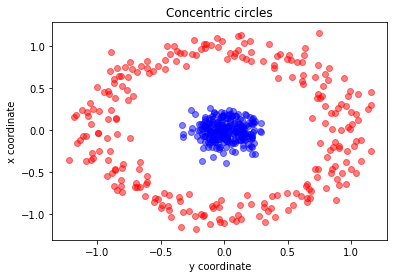

In [7]:
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=500, random_state=535, noise=0.1, factor=0.1)
plt.scatter(X[y==0, 0], X[y==0, 1], color='red', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', alpha=0.5)
plt.title('Concentric circles')
plt.ylabel('x coordinate')
plt.xlabel('y coordinate')
plt.show()

#### Performance of PCA on circle data

From the result below, it can be seen that PCA visualization of clustering is not ideal.

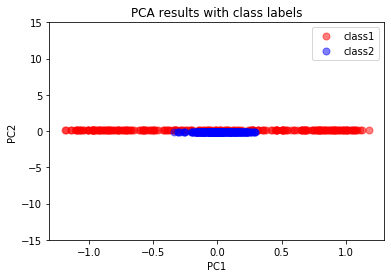

In [8]:
mean = np.mean(X,0)
centered_X = X - mean

pca_result = svd_pca(centered_X, n_components = 1)
pca_result = pca_result.transpose()
plt.ylim([-15,15])
plt.plot(pca_result[y==0,0],np.zeros((250,1))+0.1 ,'o', markersize=7, color='red', alpha=0.5, label='class1')
plt.plot(pca_result[y==1,0],np.zeros((250,1))-0.1,'o', markersize=7, color='blue', alpha=0.5, label='class2')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.title('PCA results with class labels')
plt.show()

#### Performance of Gaussian KPCA on circle data

From the result below, the performance of Gaussian KPCA is much better as the two clusters are clearly separated.

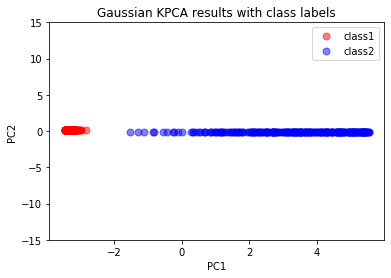

In [9]:
gaussian_transformed = gaussian_kernel(X, 15)
gaussian_KPCA_result = svd_pca(gaussian_transformed, n_components = 1)
gaussian_KPCA_result = gaussian_KPCA_result.transpose()
plt.ylim([-15,15])
plt.plot(gaussian_KPCA_result[y==0, 0],np.zeros((250,1))+0.1 ,'o', markersize=7, color='red', alpha=0.5, label='class1')
plt.plot(gaussian_KPCA_result[y==1, 0],np.zeros((250,1))-0.1,'o', markersize=7, color='blue', alpha=0.5, label='class2')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.title('Gaussian KPCA results with class labels')
plt.show()

#### Performance of Sigmoid KPCA on circle data

It can be seen that the performance of Sigmoid KPCA on half moon data is better than the polynomial KPCA.

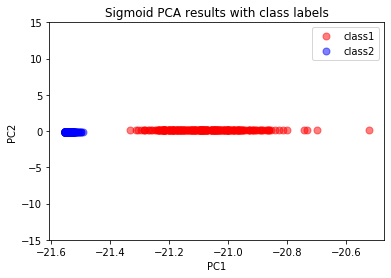

In [10]:
sigmoid_transformed = sigmoid_kernel(X, 2)
sigmoid_KPCA_result = svd_pca(sigmoid_transformed, n_components = 1)
sigmoid_KPCA_result = sigmoid_KPCA_result.transpose()
plt.ylim([-15,15])
plt.plot(sigmoid_KPCA_result[y==0, 0],np.zeros((250,1))+0.1 ,'o', markersize=7, color='red', alpha=0.5, label='class1')
plt.plot(sigmoid_KPCA_result[y==1, 0],np.zeros((250,1))-0.1,'o', markersize=7, color='blue', alpha=0.5, label='class2')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.title('Sigmoid PCA results with class labels')
plt.show()

#### Performance of polynomial KPCA on circle data

We check the performance of polynomial KPCA with half moon data. However, the separation between clusters is not obvious. Polynomial KPCA is not a good fit for circle data.

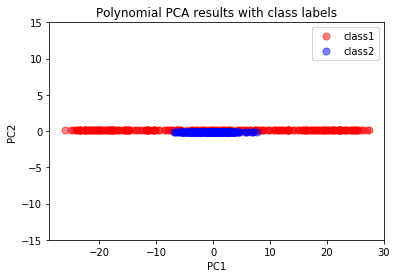

In [11]:
poly_transformed = poly_kernel(X, 2)
poly_KPCA_result = svd_pca(poly_transformed, n_components = 2)
poly_KPCA_result = poly_KPCA_result.transpose()
plt.ylim([-15,15])
plt.plot(poly_KPCA_result[y==0, 0],np.zeros((250,1))+0.1 ,'o', markersize=7, color='red', alpha=0.5, label='class1')
plt.plot(poly_KPCA_result[y==1, 0],np.zeros((250,1))-0.1,'o', markersize=7, color='blue', alpha=0.5, label='class2')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.title('Polynomial PCA results with class labels')
plt.show()

### More complex, biological data analysis

#### Inroduction of biological test data

We are going to use influenza virus data from the National Center for Biotechnology Information to test whether KPCA can visualize a more meaningful clustering. We are going to perform KPCA on bat flu and cat flu dataset. For the preprocessing of the dataset, we utilized k-mer technique, which is a common technique when dealing with unaligned biological sequences. Basically, a k-mer is one of the permutations of the four letters, 'A', 'T', 'C', 'G', of length k. For example, a 2-mer will can be 'AA', 'AT', 'TA', and so on. When applying k-mer to DNA sequences, the number of appearences of each k-mer will be counted for each sequence, and a k-mer table will be created, and the table will be regarded as an input matrix.

First, load the DNA sequence data file and create the k-mer table. The two packages are imported only for the processing the biological sequence data and create k-mer table and have nothing to do with the implementation of KPCA.

In [12]:
from Bio import SeqIO
from sklearn.feature_extraction.text import CountVectorizer

def get_gene_len(genes):
    gene_len = []

    for i in range(len(genes)):
        gene_len.append(len(genes[i]))
    return gene_len

def parseFasta(data):
    d = {fasta.id : str(fasta.seq) for fasta in SeqIO.parse(data, "fasta")}
    pd.DataFrame([d])
    s = pd.Series(d, name='Sequence')
    s.index.name = 'ID'
    s.reset_index()
    return pd.DataFrame(s)

def read_fasta(paths):
    all_genes = []
    all_gene_len = []
    
    for path in paths:
        virus = parseFasta(path)
        virus = virus.drop_duplicates(keep="last")
        genes = list(virus['Sequence'])
        genes_seq = get_gene_sequences(path)
        gene_len = get_gene_len(genes_seq)
        all_genes = all_genes + genes_seq
        all_gene_len = all_gene_len + gene_len
    return all_genes,all_gene_len

def get_gene_sequences(filename):
    genes = []
    for record in SeqIO.parse(filename, "fasta"):
        genes.append(str(record.seq))
    return genes

def get_kmer_table(paths,k_min,k_max):
    genes,gene_len = read_fasta(paths)
    count_vect = CountVectorizer(analyzer='char', ngram_range=(k_min, k_max))
    X = count_vect.fit_transform(genes)
    chars = count_vect.get_feature_names()
    kmers = X.toarray()
    kmer_freq = []
    for i in range(len(genes)):
        kmer_freq.append(kmers[i] / gene_len[i])
    input = pd.DataFrame(kmer_freq, columns=chars)
    return input

bat_len = len(get_gene_sequences("bat_flu.fa"))
cat_len = len(get_gene_sequences("cat_flu.fa"))

zeros = [0]*bat_len
labels1 = np.append(zeros, [1]*cat_len, axis=None)
paths = ["combined_Bat_Cat_flu.fa"]
kmer_table = get_kmer_table(paths, 2, 3);


In [13]:
kmer_table.shape

(178, 137)

The input data matrix has 137 columns, and we will visualize it in two dimension.

#### The result of PCA on bio data

It can be seen that the clustering is not clear enough.

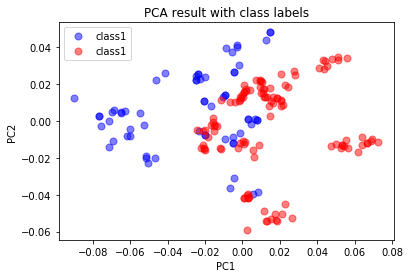

In [14]:
mean = np.mean(kmer_table,0)
centered_X = kmer_table - mean

pca_result = svd_pca(centered_X, 2)

plt.plot(pca_result[0,0:bat_len], pca_result[1,0:bat_len], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(pca_result[0,bat_len:178], pca_result[1,bat_len:178], 'o', markersize=7, color='red', alpha=0.5, label='class1')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.title('PCA result with class labels')
plt.show()

#### The result of Sigmoid KPCA

It can be seen that the clustering is clearer, and Sigmoid KPCA yields a better result, compared with linear PCA.

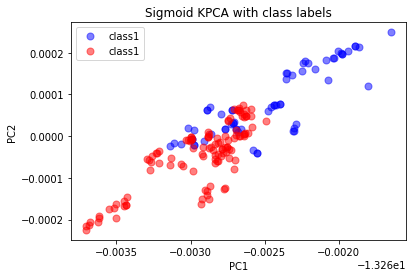

In [15]:
input_matrix = kmer_table.to_numpy()
sigmoid_transformed = sigmoid_kernel(input_matrix, -3)
pca_result2 = svd_pca(sigmoid_transformed, 2)

plt.plot(pca_result2[0,0:bat_len], pca_result2[1,0:bat_len], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(pca_result2[0,bat_len:178], pca_result2[1,bat_len:178], 'o', markersize=7, color='red', alpha=0.5, label='class1')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.title('Sigmoid KPCA with class labels')
plt.show()

#### The result of Gaussian KPCA

For this dataset, Gaussian KPCA may not be a good fit.

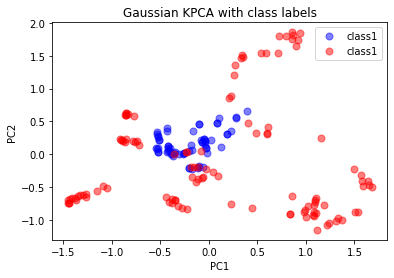

In [16]:
gaussian_transformed = gaussian_kernel(input_matrix, 1000)
pca_result3 = svd_pca(gaussian_transformed, 2)

plt.plot(pca_result3[0,0:bat_len], pca_result3[1,0:bat_len], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(pca_result3[0,bat_len:178], pca_result3[1,bat_len:178], 'o', markersize=7, color='red', alpha=0.5, label='class1')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.title('Gaussian KPCA with class labels')
plt.show()

#### The result of Polynomial KPCA

From the plot, the clusters are clearly seen by polynomial KPCA visualization.

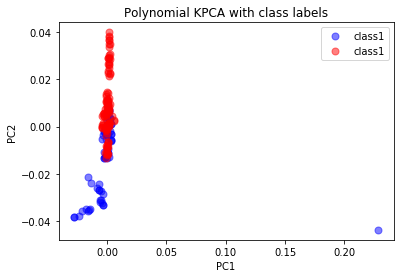

In [17]:
poly_transformed = poly_kernel(input_matrix, 2)
pca_result4 = svd_pca(poly_transformed, 2)

plt.plot(pca_result4[0,0:bat_len], pca_result4[1,0:bat_len], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(pca_result4[0,bat_len:178], pca_result4[1,bat_len:178], 'o', markersize=7, color='red', alpha=0.5, label='class1')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.title('Polynomial KPCA with class labels')
plt.show()

## References

(1) Flu dataset: Bao Y., P. Bolotov, D. Dernovoy, B. Kiryutin, L. Zaslavsky, T. Tatusova, J. Ostell, and D. Lipman.J. Virol. The Influenza Virus Resource at the National Center for Biotechnology Information. 2008 Jan;82(2):596-601. 

(2) Generated Datasets: scikit-learn.org/stable/datasets/index.html.

(3) Pelliccia, Daniel. PCA and Kernel PCA Explained. NIRPY Research, 14 Aug. 2020, nirpyresearch.com/pca-kernel-pca-explained/.

(4) Implementation: Raschka, Sebastian. Kernel Tricks and Nonlinear Dimensionality Reduction via RBF Kernel PCA, 14 Sept. 2014, sebastianraschka.com/Articles/2014_kernel_pca.html.

(5) Shiokawa, Y., Date, Y. & Kikuchi, J. Application of kernel principal component analysis and computational machine learning to exploration of metabolites strongly associated with diet. Sci Rep 8, 3426 (2018). https://doi.org/10.1038/s41598-018-20121-w